In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine,text

# MySQL connection details
user = "root"
password = "Ashish25sahu%40"   # @ replace with %40 coz it creating problen regarding localhost
host = "localhost"
database = "Vandor_dataset"

# Create SQLAlchemy engine
engine = create_engine(f"mysql+mysqlconnector://{user}:{password}@{host}/{database}")



In [2]:
table = pd.read_sql_query("SELECT * FROM vendor_sales_summary LIMIT 5", engine)

table


,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargine,StockTurnver,SalesToPurchaseRatoi
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080.0,3.811252e+06,1174.0,42252.260647,8997.500420,2156.980000,68601.68,-3.768999e+06,-8920.231202,0.008092,0.011086
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038.0,3.804041e+06,871.0,26121.289900,7197.599945,1600.290001,144929.24,-3.777920e+06,-14462.991480,0.005310,0.006867
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407.0,3.418304e+06,1379.0,35624.209873,7143.239937,2533.669989,123780.22,-3.382679e+06,-9495.451227,0.007358,0.010422
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682.0,3.261198e+06,2643.0,58119.569670,6179.189936,4856.349973,257032.07,-3.203078e+06,-5511.187359,0.013105,0.017822
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109.0,3.023206e+06,1402.0,42265.979935,6911.709948,2575.999992,257032.07,-2.980940e+06,-7052.811785,0.010151,0.013981


# Exploratory Data Analysis



Previously, we examined the various tables in the database to identify key variables, understand their relationships, and determine which ones should be included in the final analysis.

In this phase of EDA, we will analyze the resultant table to gain insights into the distribution of each column. This will help us understand data patterns, identify anomalies, and ensure data quality before proceeding with further analysis.

In [7]:
table = pd.read_sql_query("SELECT * FROM vendor_sales_summary ", engine)
table.head()

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargine,StockTurnver,SalesToPurchaseRatoi
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080.0,3.811252e+06,1174.0,42252.260647,8997.500420,2156.980000,68601.68,-3.768999e+06,-8920.231202,0.008092,0.011086
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038.0,3.804041e+06,871.0,26121.289900,7197.599945,1600.290001,144929.24,-3.777920e+06,-14462.991480,0.005310,0.006867
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407.0,3.418304e+06,1379.0,35624.209873,7143.239937,2533.669989,123780.22,-3.382679e+06,-9495.451227,0.007358,0.010422
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682.0,3.261198e+06,2643.0,58119.569670,6179.189936,4856.349973,257032.07,-3.203078e+06,-5511.187359,0.013105,0.017822
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109.0,3.023206e+06,1402.0,42265.979935,6911.709948,2575.999992,257032.07,-2.980940e+06,-7052.811785,0.010151,0.013981


In [4]:
# statistics values

In [9]:
table.describe().T
# .T used to transpose the table

,count,mean,std,min,25%,50%,75%,max
VendorNumber,10692.0,10650.649458,18753.519148,2.000000e+00,3951.000000,7153.000000,9552.000000,2.013590e+05
Brand,10692.0,18039.228769,12662.187074,5.800000e+01,5793.500000,18761.500000,25514.250000,9.063100e+04
PurchasePrice,10692.0,24.385303,109.269375,3.600000e-01,6.840000,10.455000,19.482500,5.681810e+03
ActualPrice,10692.0,35.643671,148.246016,4.900000e-01,10.990000,15.990000,28.990000,7.499990e+03
Volume,10692.0,847.360550,664.309212,5.000000e+01,750.000000,750.000000,750.000000,2.000000e+04
TotalPurchaseQuantity,10692.0,3140.886831,11095.086769,1.000000e+00,36.000000,262.000000,1975.750000,3.376600e+05
TotalPurchaseDollars,10692.0,30106.693354,123067.799573,7.100000e-01,453.457510,3655.464971,20738.244730,3.811252e+06
TotalSalesQuantity,10692.0,27.411336,110.309616,0.000000e+00,0.000000,0.000000,12.000000,3.118000e+03
TotalSalesDollars,10692.0,356.510079,1517.270238,0.000000e+00,0.000000,0.000000,188.802497,5.811957e+04
TotalSalesPrice,10692.0,179.292080,516.672213,0.000000e+00,0.000000,0.000000,118.829996,8.997500e+03


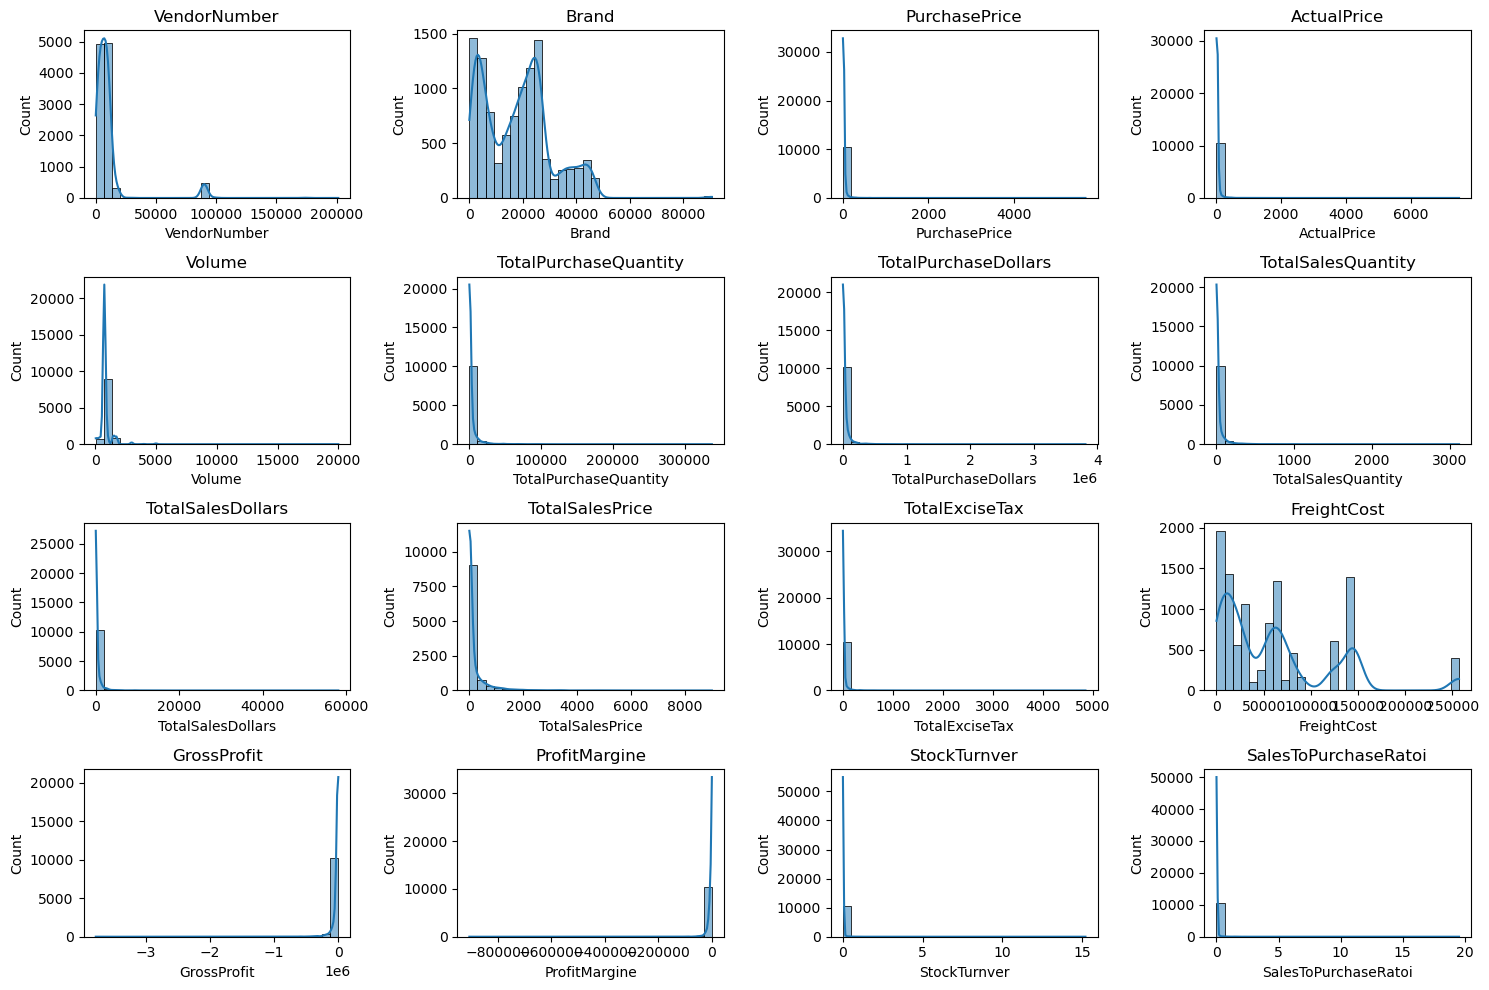

In [20]:
# Distribution Plots for Numerical Columns

numerical_cols = table.select_dtypes(include=np.number).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 4, i+1) #Adjust grid layout as needed
    sns.histplot(table[col], kde=True, bins=30)
    plt.title(col)

plt.tight_layout()

plt.show()

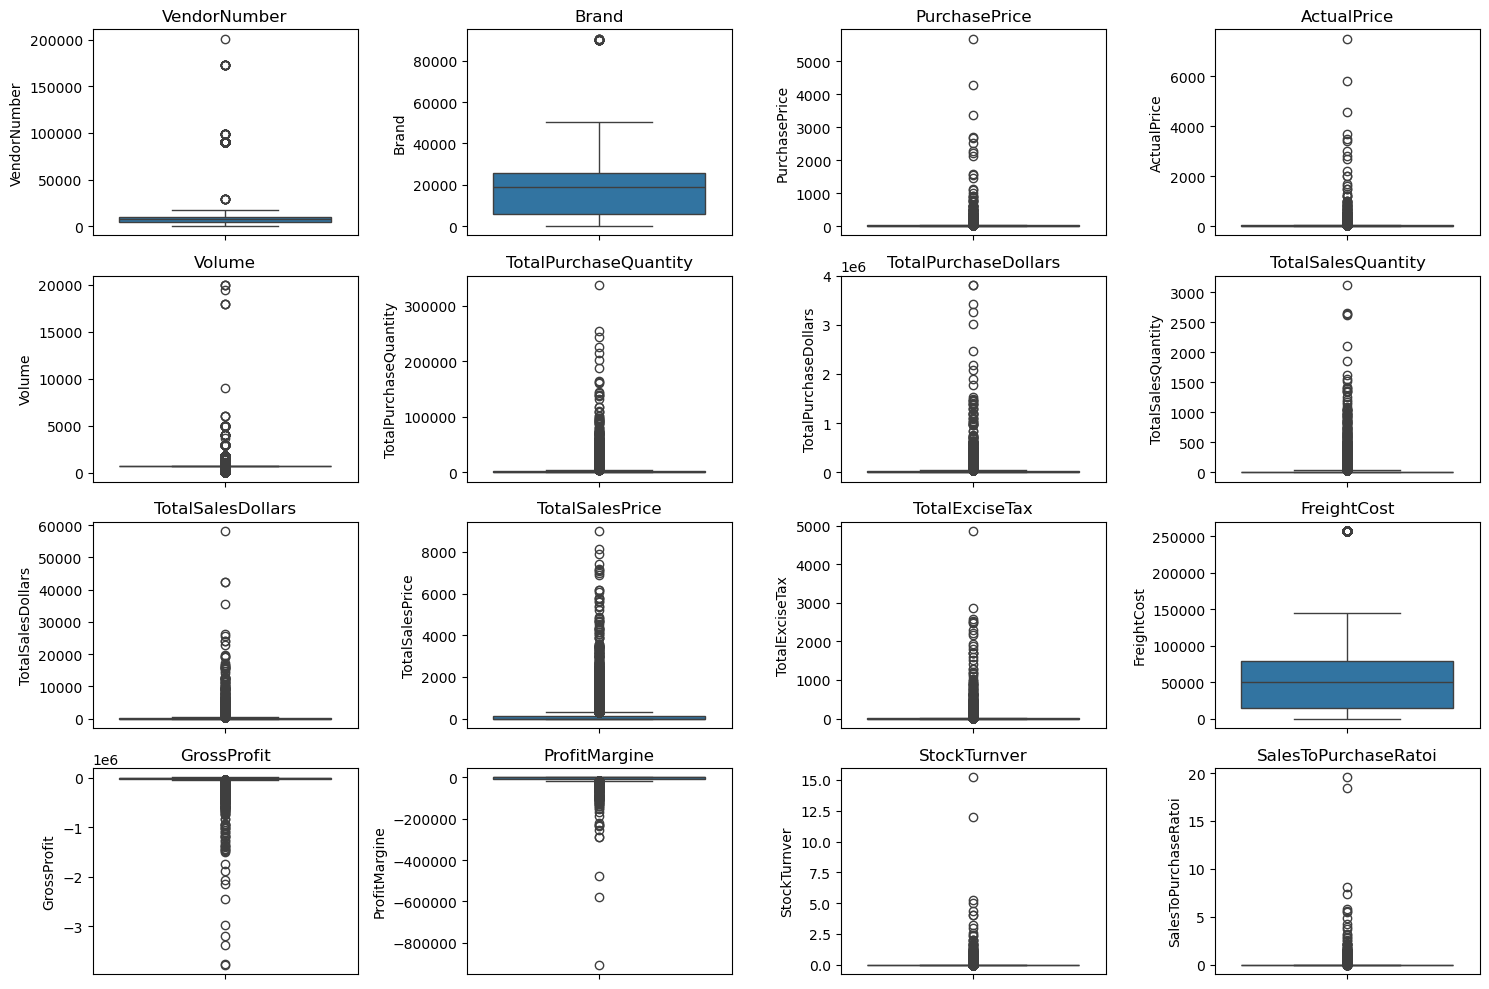

In [22]:
# Distribution Plots for Numerical Columns

numerical_cols = table.select_dtypes(include=np.number).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 4, i+1) #Adjust grid layout as needed
    sns.boxplot(table[col])
    plt.title(col)

plt.tight_layout()

plt.show()

# Summary Statistics Insights:

Negative & Zero Values:

1. Gross Profit: Minimum value is -52,002.78, indicating losses. Some products or transactions may be selling at a loss due to high costs or selling at discounts lower than the purchase price..

2. Profit Margin: Has a minimum of -00, which suggests cases where revenue is zero or even lower than costs

3. Total Sales Quantity & Sales Dollars: Minimum values are 0, meaning some products were purchased but never sold. These could be slow-moving or obsolete stock.

Outliers Indicated by High Standard Deviations:

1. Purchase & Actual Prices: The max values (5,681.81 & 7,499.99) are significantly higher than the mean (24.39 & 35.64), indicating potential premium products.

2. Freight Cost: Huge variation, from 0.09 to 257,032.07, suggests logistics inefficiencies or bulk shipments.

3. Stock Turnover: Ranges from 0 to 274.5, implying some products sell extremely fast while others remain in stock indefinitely. Value more than 1 indicates that Sold quantity for that product is higher than purchased quantity due to either sales are being fulfilled from older stock.

# Summary Statistics Insights

1.Gross Profit: Minimum -52,002.78 → losses from high costs or deep discounts.

2.Profit Margin: Negative values → revenue lower than costs.

3.Sales Quantity & Dollars: Some at 0 → unsold or obsolete stock.

4.Prices: Max much higher than mean → presence of premium products.

5.Freight Cost: Extreme range (0.09–257,032.07) → logistics inefficiencies or bulk shipments.

6.Stock Turnover: 0–274.5 → some products stagnant, others selling rapidly; >1 suggests sales from older stock.

In [30]:
table = pd.read_sql_query("SELECT * FROM vendor_sales_summary WHERE GrossProfit >0 AND TotalSalesQuantity >0 AND ProfitMargine>0 ", engine)
table

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargine,StockTurnver,SalesToPurchaseRatoi
0,4425,MARTIGNETTI COMPANIES,24936,T-Vine Petite Sirah Napa,9.67,14.99,750.0,105.0,1015.350012,69.0,1034.310011,299.799995,7.720000,144929.24,18.959999,1.833106,0.657143,1.018673
1,1128,BROWN-FORMAN CORP,7780,Herradura Reposado Lot 598,34.58,45.99,750.0,24.0,829.919983,22.0,1011.780003,229.950008,17.330000,68601.68,181.860020,17.974265,0.916667,1.219130
2,9552,M S WALKER INC,8550,S S Pierce Vodka,9.39,12.49,1750.0,72.0,676.080017,120.0,1498.800049,12.490000,220.500000,55551.82,822.720032,54.891914,1.666667,2.216897
3,4692,KOBRAND CORPORATION,20422,M Chiarlo Barberesco Anni 09,18.06,27.99,750.0,26.0,469.560003,20.0,559.800013,223.919998,2.230000,9139.38,90.240009,16.120044,0.769231,1.192180
4,2000,SOUTHERN WINE & SPIRITS NE,19684,Ch Magdelaine 10 St Emilion,75.86,109.99,750.0,6.0,455.160004,6.0,659.940002,109.989998,0.680000,19016.59,204.779999,31.030093,1.000000,1.449908
5,1128,BROWN-FORMAN CORP,1550,Jack Daniels Tennessee Fire,2.91,3.99,100.0,139.0,404.489994,168.0,670.320009,319.200001,17.530000,68601.68,265.830015,39.657180,1.208633,1.657198
6,2000,SOUTHERN WINE & SPIRITS NE,23230,High Valley Svgn Bl 13 Lake,9.39,13.99,750.0,41.0,384.990003,49.0,685.510008,279.799995,5.470000,19016.59,300.520005,43.838894,1.195122,1.780592
7,9552,M S WALKER INC,23395,Pavilion St Pierre Cdu Rhone,6.45,9.99,750.0,59.0,380.549997,109.0,1088.909981,409.589991,12.210000,55551.82,708.359983,65.052208,1.847458,2.861411
8,7245,PROXIMO SPIRITS INC.,1039,Three Olives Vodka w/Flask,10.31,14.99,750.0,34.0,350.540000,30.0,389.699993,311.759995,23.640001,38994.78,39.159993,10.048754,0.882353,1.111713
9,10754,PERFECTA WINES,23173,Four Star Cab Svgn,9.45,13.99,750.0,33.0,311.850006,42.0,587.579998,335.759995,4.670000,28720.52,275.729992,46.926375,1.272727,1.884175


In [29]:
table = pd.read_sql_query("SELECT * FROM vendor_sales_summary ", engine)
table

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargine,StockTurnver,SalesToPurchaseRatoi
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080.0,3.811252e+06,1174.0,42252.260647,8997.500420,2156.980000,68601.68,-3.768999e+06,-8920.231202,0.008092,0.011086
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038.0,3.804041e+06,871.0,26121.289900,7197.599945,1600.290001,144929.24,-3.777920e+06,-14462.991480,0.005310,0.006867
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407.0,3.418304e+06,1379.0,35624.209873,7143.239937,2533.669989,123780.22,-3.382679e+06,-9495.451227,0.007358,0.010422
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682.0,3.261198e+06,2643.0,58119.569670,6179.189936,4856.349973,257032.07,-3.203078e+06,-5511.187359,0.013105,0.017822
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109.0,3.023206e+06,1402.0,42265.979935,6911.709948,2575.999992,257032.07,-2.980940e+06,-7052.811785,0.010151,0.013981
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10687,9815,WINE GROUP INC,8527,Concannon Glen Ellen Wh Zin,1.32,4.99,750.0,2.0,2.640000e+00,0.0,0.000000,0.000000,0.000000,27100.41,-2.640000e+00,0.000000,0.000000,0.000000
10688,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,0.39,0.49,50.0,6.0,2.340000e+00,0.0,0.000000,0.000000,0.000000,50293.62,-2.340000e+00,0.000000,0.000000,0.000000
10689,3924,HEAVEN HILL DISTILLERIES,9123,Deep Eddy Vodka,0.74,0.99,50.0,2.0,1.480000e+00,0.0,0.000000,0.000000,0.000000,14069.87,-1.480000e+00,0.000000,0.000000,0.000000
10690,3960,DIAGEO NORTH AMERICA INC,6127,The Club Strawbry Margarita,1.47,1.99,200.0,1.0,1.470000e+00,0.0,0.000000,0.000000,0.000000,257032.07,-1.470000e+00,0.000000,0.000000,0.000000


In [31]:
# Filter the data those are inconsistancies

In [36]:
table = pd.read_sql_query("SELECT * FROM vendor_sales_summary WHERE GrossProfit >0 OR TotalSalesQuantity >0 OR ProfitMargine>0 ", engine)
table

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargine,StockTurnver,SalesToPurchaseRatoi
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080.0,3.811252e+06,1174.0,42252.260647,8997.500420,2156.980000,68601.68,-3.768999e+06,-8920.231202,0.008092,0.011086
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038.0,3.804041e+06,871.0,26121.289900,7197.599945,1600.290001,144929.24,-3.777920e+06,-14462.991480,0.005310,0.006867
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407.0,3.418304e+06,1379.0,35624.209873,7143.239937,2533.669989,123780.22,-3.382679e+06,-9495.451227,0.007358,0.010422
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682.0,3.261198e+06,2643.0,58119.569670,6179.189936,4856.349973,257032.07,-3.203078e+06,-5511.187359,0.013105,0.017822
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109.0,3.023206e+06,1402.0,42265.979935,6911.709948,2575.999992,257032.07,-2.980940e+06,-7052.811785,0.010151,0.013981
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4397,8352,LUXCO INC,1007,12 Days of Pearls Gift Set,7.19,9.99,50.0,1.0,7.190000e+00,2.0,19.980000,19.980000,0.100000,10261.60,1.279000e+01,64.014013,2.000000,2.778859
4398,12546,JIM BEAM BRANDS COMPANY,5250,DeKuyper Buttershots Trav,7.14,9.99,750.0,1.0,7.140000e+00,1.0,10.990000,10.990000,0.790000,123880.97,3.850000e+00,35.031847,1.000000,1.539216
4399,7153,PINE STATE TRADING CO,41231,Mad Dogs & Englishmen Jumil,6.53,9.99,750.0,1.0,6.530000e+00,2.0,27.980000,27.980000,0.220000,15884.82,2.145000e+01,76.661900,2.000000,4.284839
4400,9552,M S WALKER INC,8151,St Elder Elderflower Liqueur,0.71,0.99,50.0,8.0,5.680000e+00,10.0,9.900000,7.920000,0.500000,55551.82,4.220000e+00,42.626265,1.250000,1.742958


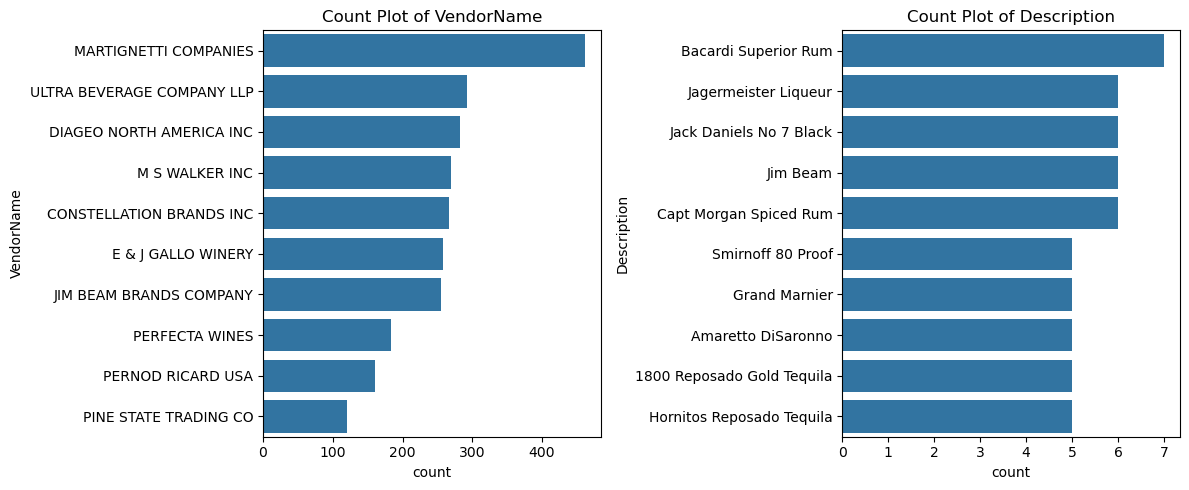

In [46]:
# Count Plots for Categorical Columns

categorical_cols = ["VendorName", "Description"]

plt.figure(figsize=(12, 5))

for i, col in enumerate(categorical_cols):
    plt.subplot(1, 2, i+1)
    sns.countplot(y=table[col], order=table[col].value_counts().index[:10])
    plt.title(f"Count Plot of {col}")  # Top 10 categories

plt.tight_layout()

plt.show()

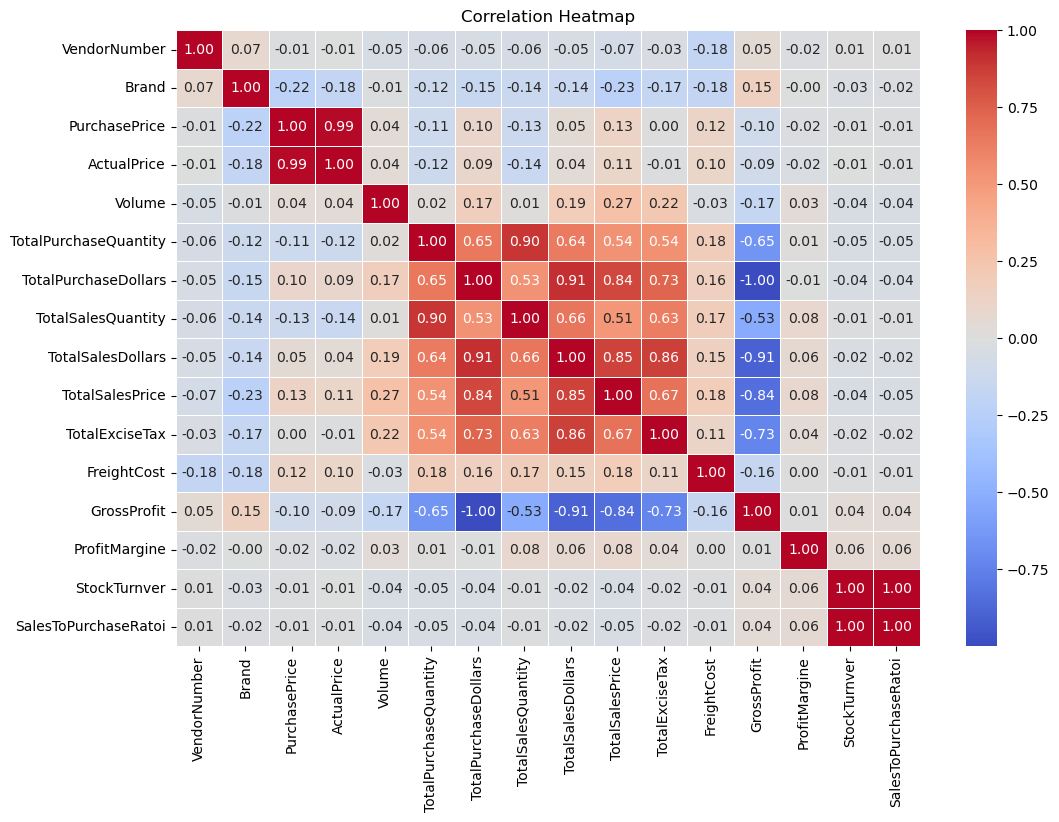

In [52]:
# Correlation Heatmap

plt.figure(figsize=(12, 8))

correlation_matrix = table[numerical_cols].corr()

sns.heatmap(correlation_matrix, annot =True, fmt=".2f", cmap="coolwarm", linewidths=0.5)

plt.title("Correlation Heatmap")

plt.show()

PurchasePrice & ActualPrice are almost perfectly correlated (0.99) → prices move together.

Gross Profit is strongly negatively correlated with Total Purchase Dollars (-1.00), Sales Dollars (-0.91), and Sales Price (-0.84) → higher sales volumes don’t guarantee profit.

Total Sales Quantity, Sales Dollars, and Sales Price are all highly correlated (>0.8) → sales metrics move closely together.

Freight Cost has weak correlations overall, suggesting logistics costs vary independently of sales/purchase patterns.

# Insights for business understandings
Brands that needs Promotional which exhibit lover sales performance but higher profit

In [64]:
table = pd.read_sql_query("SELECT * FROM vendor_sales_summary WHERE  ProfitMargine>0 ", engine)
table

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargine,StockTurnver,SalesToPurchaseRatoi
0,4425,MARTIGNETTI COMPANIES,24936,T-Vine Petite Sirah Napa,9.67,14.99,750.0,105.0,1015.350012,69.0,1034.310011,299.799995,7.720000,144929.24,18.959999,1.833106,0.657143,1.018673
1,1128,BROWN-FORMAN CORP,7780,Herradura Reposado Lot 598,34.58,45.99,750.0,24.0,829.919983,22.0,1011.780003,229.950008,17.330000,68601.68,181.860020,17.974265,0.916667,1.219130
2,9552,M S WALKER INC,8550,S S Pierce Vodka,9.39,12.49,1750.0,72.0,676.080017,120.0,1498.800049,12.490000,220.500000,55551.82,822.720032,54.891914,1.666667,2.216897
3,4692,KOBRAND CORPORATION,20422,M Chiarlo Barberesco Anni 09,18.06,27.99,750.0,26.0,469.560003,20.0,559.800013,223.919998,2.230000,9139.38,90.240009,16.120044,0.769231,1.192180
4,2000,SOUTHERN WINE & SPIRITS NE,19684,Ch Magdelaine 10 St Emilion,75.86,109.99,750.0,6.0,455.160004,6.0,659.940002,109.989998,0.680000,19016.59,204.779999,31.030093,1.000000,1.449908
5,1128,BROWN-FORMAN CORP,1550,Jack Daniels Tennessee Fire,2.91,3.99,100.0,139.0,404.489994,168.0,670.320009,319.200001,17.530000,68601.68,265.830015,39.657180,1.208633,1.657198
6,2000,SOUTHERN WINE & SPIRITS NE,23230,High Valley Svgn Bl 13 Lake,9.39,13.99,750.0,41.0,384.990003,49.0,685.510008,279.799995,5.470000,19016.59,300.520005,43.838894,1.195122,1.780592
7,9552,M S WALKER INC,23395,Pavilion St Pierre Cdu Rhone,6.45,9.99,750.0,59.0,380.549997,109.0,1088.909981,409.589991,12.210000,55551.82,708.359983,65.052208,1.847458,2.861411
8,7245,PROXIMO SPIRITS INC.,1039,Three Olives Vodka w/Flask,10.31,14.99,750.0,34.0,350.540000,30.0,389.699993,311.759995,23.640001,38994.78,39.159993,10.048754,0.882353,1.111713
9,10754,PERFECTA WINES,23173,Four Star Cab Svgn,9.45,13.99,750.0,33.0,311.850006,42.0,587.579998,335.759995,4.670000,28720.52,275.729992,46.926375,1.272727,1.884175


In [73]:
brand_performance = table.groupby('Description').agg({'TotalSalesDollars': 'sum', 'ProfitMargine': 'mean'})

In [74]:
brand_performance

,TotalSalesDollars,ProfitMargine
Description,,
12 Days of Pearls Gift Set,19.980000,64.014013
B & B Dom VAP,199.920000,81.882752
Bacardi Coconut,243.540000,49.043279
Barbarossa Spiced Rum,43.959999,61.828933
Belguardo Serrata Toscana,429.569992,37.146448
Beniotome Sesame Shochu,29.990000,25.941983
Blue Chair Bay Banana Rum,122.760000,3.421312
Blue Chair Bay Coconut Rum,150.480000,94.883041
Bodega Elena de Mendoza Mlbc,244.649992,86.380543


In [60]:
# setting cutoff

In [96]:
low_sales = brand_performance['TotalSalesDollars'].quantile(0.50)
high_margine = brand_performance['ProfitMargine'].quantile(0.85)

In [97]:
low_sales

np.float64(188.88000106811523)

In [98]:
high_margine

np.float64(75.6094112511285)

In [99]:
#Filter brands with low sales but high profit margins

target_brands = brand_performance[
(brand_performance['TotalSalesDollars'] <= low_sales) &
(brand_performance['ProfitMargine'] >= high_margine)
]


print("Brands with Low Sales but High Profit Margins:")

display(target_brands.sort_values('TotalSalesDollars'))

Brands with Low Sales but High Profit Margins:


,TotalSalesDollars,ProfitMargine
Description,,
Mad Dogs & Englishmen Jumil,27.980000,76.661900
Nyers Vyds Sage Canyon Red,75.960001,82.754081
Pinnacle Vodka Gift Pak,144.869997,82.211637
Blue Chair Bay Coconut Rum,150.480000,94.883041


In [104]:
#Top Vendors & Brands by Sales Performance

top_vendors = table.groupby("VendorName")["TotalSalesDollars"].sum().nlargest(10)
top_brands= table.groupby("Description")["TotalSalesDollars"].sum().nlargest (10)



In [105]:
top_vendors



VendorName
M S WALKER INC                2913.890034
ULTRA BEVERAGE COMPANY LLP    2905.049975
BROWN-FORMAN CORP             1923.990011
SOUTHERN WINE & SPIRITS NE    1909.330015
MARTIGNETTI COMPANIES         1110.270012
VINILANDIA USA                 894.879978
KOBRAND CORPORATION            815.640013
JIM BEAM BRANDS COMPANY        773.160000
PERFECTA WINES                 687.519997
DIAGEO NORTH AMERICA INC       650.550005
Name: TotalSalesDollars, dtype: float64

In [106]:
top_brands

Description
S S Pierce Vodka                1498.800049
Havens Cab Svgn 11              1331.260012
Pavilion St Pierre Cdu Rhone    1088.909981
T-Vine Petite Sirah Napa        1034.310011
Herradura Reposado Lot 598      1011.780003
Zinsane Znfdl Lodi               894.879978
High Valley Svgn Bl 13 Lake      685.510008
Jack Daniels Tennessee Fire      670.320009
Ch Magdelaine 10 St Emilion      659.940002
Conti Zecca Negroamaro 10        589.409986
Name: TotalSalesDollars, dtype: float64

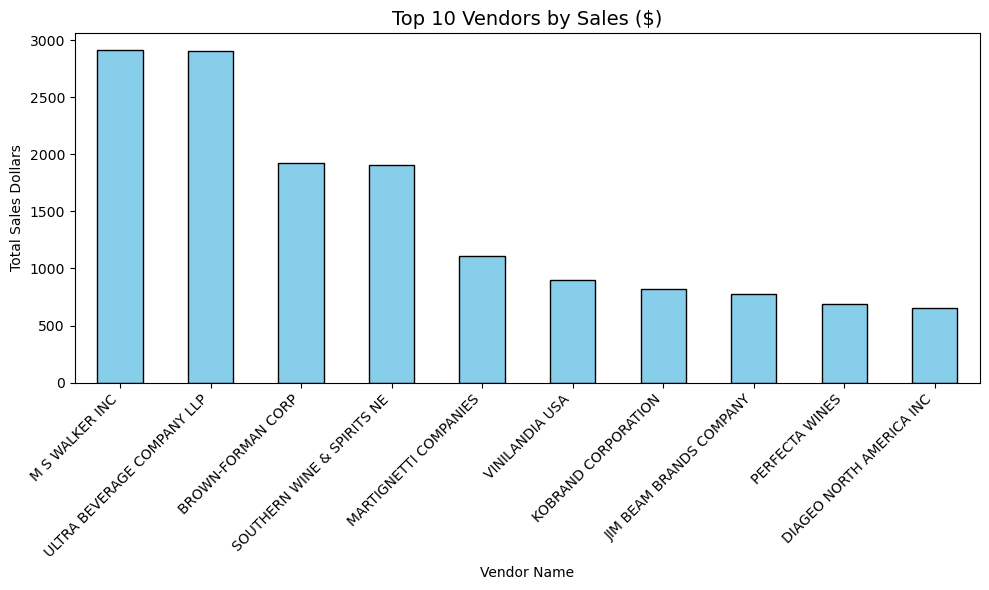

In [120]:
# Count Plots for Categorical Columns



# Plot Vendors
plt.figure(figsize=(10,6))
top_vendors.plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Top 10 Vendors by Sales ($)", fontsize=14)
plt.xlabel("Vendor Name")
plt.ylabel("Total Sales Dollars")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()



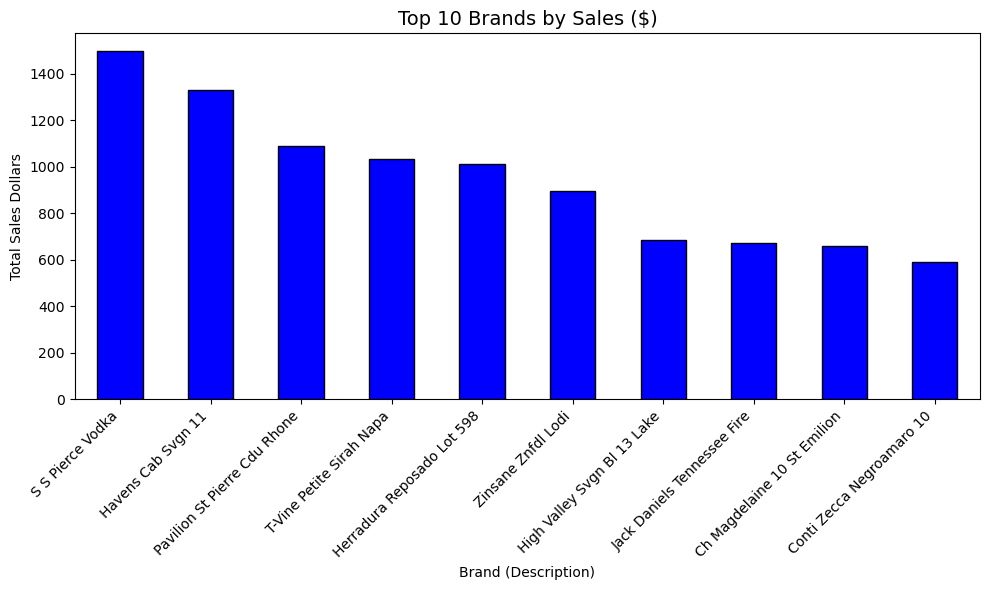

In [116]:
# Plot Brands
plt.figure(figsize=(10,6))
top_brands.plot(kind="bar", color="blue", edgecolor="black")
plt.title("Top 10 Brands by Sales ($)", fontsize=14)
plt.xlabel("Brand (Description)")
plt.ylabel("Total Sales Dollars")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [126]:

vendor_performance = table.groupby('VendorName').agg({

'TotalPurchaseDollars': 'sum',

'GrossProfit':'sum',

'TotalSalesDollars': 'sum'}).reset_index()

In [131]:
vendor_performance['Purchase Conributions'] = vendor_performance['TotalPurchaseDollars']*100/ vendor_performance['TotalPurchaseDollars'].sum()

In [132]:
vendor_performance

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,Purchase Conributions
0,BACARDI USA INC,160.320000,283.140001,443.460000,1.684021
1,BROWN-FORMAN CORP,1314.229977,609.760034,1923.990011,13.804835
2,CASTLE BRANDS CORP.,174.300002,23.579995,197.879997,1.830869
3,CONSTELLATION BRANDS INC,106.560004,36.989996,143.550000,1.119320
4,DIAGEO NORTH AMERICA INC,268.820004,381.730001,650.550005,2.823719
5,E & J GALLO WINERY,33.320000,211.329992,244.649992,0.349997
6,HEAVEN HILL DISTILLERIES,93.519997,36.470009,129.990005,0.982346
7,JIM BEAM BRANDS COMPANY,426.489998,346.670002,773.160000,4.479904
8,KOBRAND CORPORATION,660.440008,155.200005,815.640013,6.937344
9,LUXCO INC,7.190000,12.789999,19.980000,0.075525


In [136]:
vendor_performance.sort_values('Purchase Conributions', ascending = False)

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,Purchase Conributions
1,BROWN-FORMAN CORP,1314.229977,609.760034,1923.990011,13.804835
10,M S WALKER INC,1291.570016,1622.320018,2913.890034,13.566812
19,SOUTHERN WINE & SPIRITS NE,1067.020001,842.310014,1909.330015,11.208111
12,MARTIGNETTI COMPANIES,1028.450012,81.820000,1110.270012,10.802967
22,ULTRA BEVERAGE COMPANY LLP,846.430003,2058.619973,2905.049975,8.891006
8,KOBRAND CORPORATION,660.440008,155.200005,815.640013,6.937344
20,STATE WINE & SPIRITS,429.839993,206.579998,636.419991,4.515093
7,JIM BEAM BRANDS COMPANY,426.489998,346.670002,773.160000,4.479904
15,PERFECTA WINES,366.340004,321.179993,687.519997,3.848081
17,PROXIMO SPIRITS INC.,350.540000,39.159993,389.699993,3.682116
